In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
usag = pd.read_csv('usagers-2022.csv', index_col = 'Num_Acc', sep=';')
usag

,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
Num_Acc,,,,,,,,,,,,,,,
202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1
202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1
202200000002,1 099 698,813 950,B01,1,1,4,1,1988.0,9,1,0,-1,0,0,-1
202200000002,1 099 699,813 951,A01,1,1,1,1,1970.0,4,1,0,-1,0,0,-1
202200000003,1 099 696,813 948,A01,1,1,1,1,2002.0,0,1,0,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202200055301,968 230,715 631,A01,1,1,1,2,2002.0,5,1,-1,-1,0,0,-1
202200055301,968 231,715 631,A01,8,2,3,2,2004.0,5,1,-1,-1,0,0,-1
202200055301,968 232,715 632,B01,1,1,4,2,1953.0,5,1,-1,-1,0,0,-1


on définit l'index comme étant 'Num_acc' : qui va permettre de faire le lien avec les autres dataframes. Maintenant on supprime les colonnes inutiles : id usager, id vehicule, num_veh, trajet, secu1, secu2, secu3, etatp, actp, locp

In [21]:
usag = usag.drop(['id_usager', 'id_vehicule', 'num_veh', 'trajet','secu1','secu2','secu3','etatp','actp','locp'], axis= 1)
usag['sexe'] = usag.apply(lambda x: 'Homme' if x['sexe'] <2 else 'Femme', axis = 1)

usag

,place,catu,grav,sexe,an_nais
Num_Acc,,,,,
202200000001,1,1,3,Homme,2008.0
202200000001,1,1,1,Homme,1948.0
202200000002,1,1,4,Homme,1988.0
202200000002,1,1,1,Homme,1970.0
202200000003,1,1,1,Homme,2002.0
...,...,...,...,...,...
202200055301,1,1,1,Femme,2002.0
202200055301,8,2,3,Femme,2004.0
202200055301,1,1,4,Femme,1953.0


On ne conserve que les données permettant de faire du traitement (que l'on juge) utile. Regardons par exemple le nombre d'accident selon la catégorie d'age du conducteur. On crée une nouvelle colonne d'age et on compte le nombre avec value counts

<Axes: xlabel='New_age'>

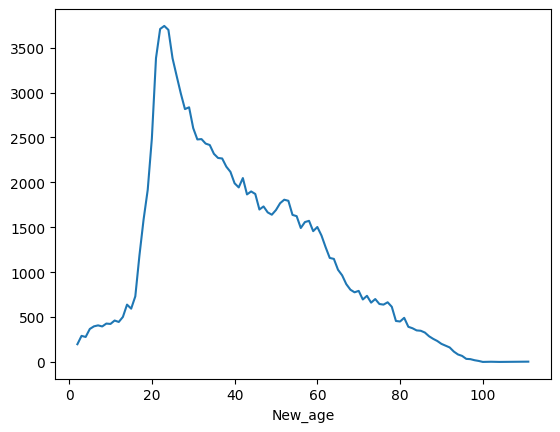

In [22]:
usag1 = usag.copy()
usag1['New_age'] = 2024 - usag1['an_nais']

usag1['New_age'].value_counts().sort_index().plot() 

On en déduit que les accidents impliquent majoritairement des personnes dont l'age se situe autour de 20/25 ans, potentiellement expliqué par un comportement plus dangereux sur la route/manque d'expérience.

Maintenant on peut visualiser le nombre d'accidents mortels par âge, on crée un masque

<Axes: xlabel='New_age'>

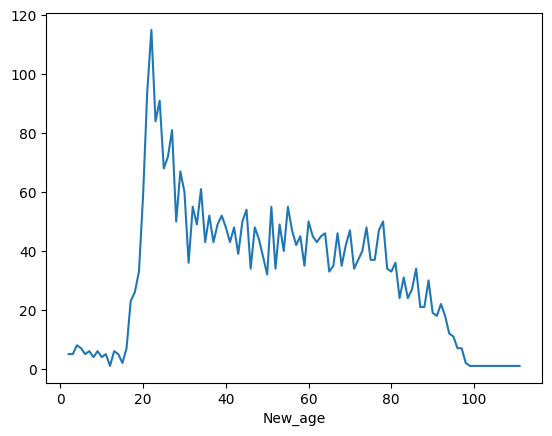

In [23]:
usag2 = usag1.loc[((usag['grav'] ==2))] 
usag2['New_age'].value_counts().sort_index().plot()

<Axes: xlabel='place'>

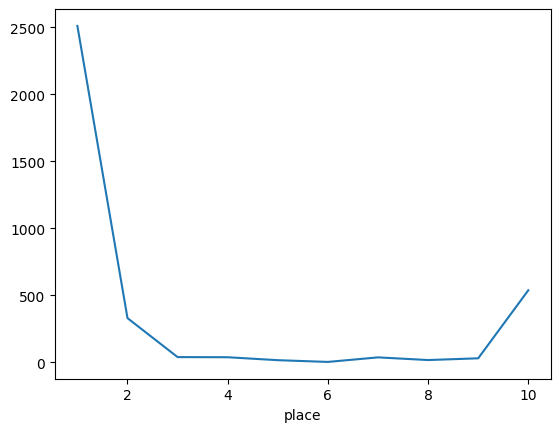

In [24]:
usag2 = usag1.loc[(usag['grav'] ==2)]
usag2['place'].value_counts().sort_index().plot()

Nous avons tracé le nombre de personnes tuées en fonction de leur place dans le vehicule (2 = place proche du conducteur, 1 = conducteur, 10 = piéton). On remarque que contrairement à l'idée reçue de la "place du mort" : les passagers à l'avant sont au final moins impliqués que les conducteurs dans les accidents mortels. Nous essayerons de l'expliquer par le nombre de passagers moyens dans le vehicule.
Enfin, nous cherchons le nombre d'accidents causés par une femme/homme : selon plusieurs gravités.

In [25]:
usag3= usag1.loc[(usag['catu']==1) & (usag['sexe']!= -1)] # on ne selectionne que les conducteurs

<Axes: xlabel='sexe'>

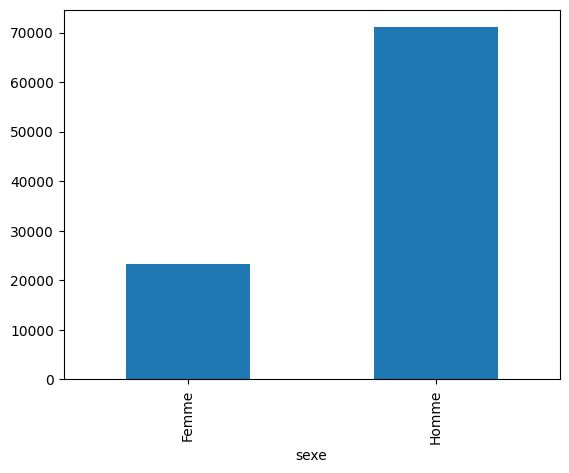

In [26]:
usag3.groupby(by= 'sexe').size().plot.bar()

Les femmes conducteurs ont moins d'accidents que les hommes : maintenant regardons la gravité de ces accidents. 

<Axes: xlabel='sexe,grav'>

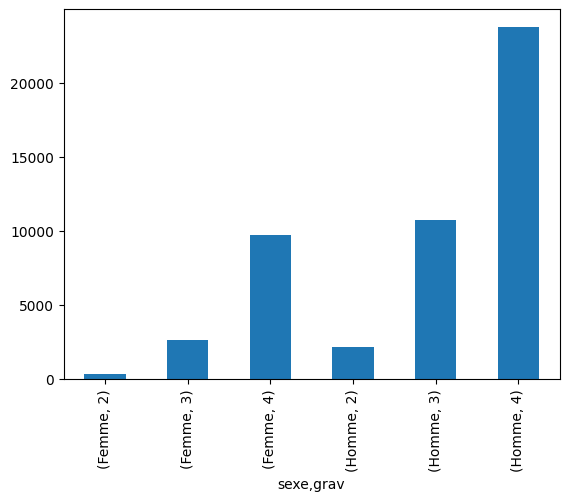

In [36]:
usag4 = usag1.loc[ (usag['catu']==1) & (usag['sexe']!= -1) & (usag['grav']!=-1)  & (usag['grav']!=1) ]
usag4.groupby(by=['sexe','grav']).size().plot(kind='bar')

On a donc tracé ici le nombre d'accidents en fontion du couple (sexe, gravité de l'accident). Il pourrait être intéressant de normaliser pour pouvoir comparer les femmes et hommes (car les hommes ont plus d'accidents). On ne change pas les index de gravité étant : 1  indemmne, 2 = tué, 3= blessé gravement, 4= blessé légèrement, pour cause de visibilité..

<Axes: xlabel='sexe,grav'>

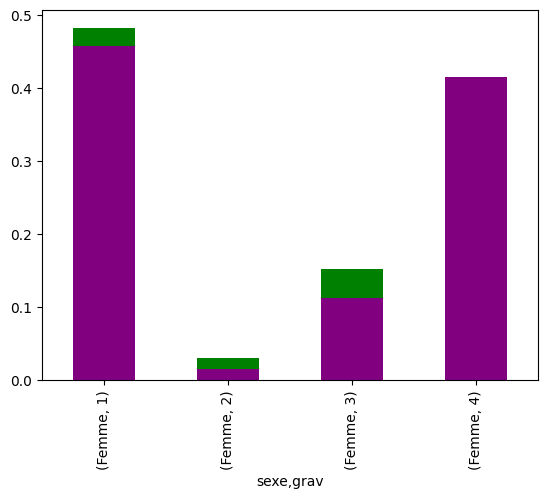

In [41]:
usag5 = usag1.loc[ (usag['catu']==1) & (usag['sexe']=='Homme') & (usag['grav']!=-1)]
(usag5.groupby(by=['sexe','grav']).size()/len(usag5)).plot(kind ='bar', color = 'green')

usag6 = usag1.loc[ (usag['catu']==1) & (usag['sexe']=='Femme') & (usag['grav']!=-1)]
(usag6.groupby(by=['sexe','grav']).size()/len(usag6)).plot(kind ='bar', color ='purple')

On remarque que les femmes ont plus d'accidents avec blessure legère que les hommes mais ont moins d'accidents impliquant une hospitalisation. Elles auraient donc un comportement moins dangereux sur la route.